In [11]:
import pandas as pd

In [13]:
dataset = pd.read_csv("Reviews.csv")

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [15]:
df=pd.read_csv("Reviews.csv")
print(df.shape)
df= df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [16]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [18]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


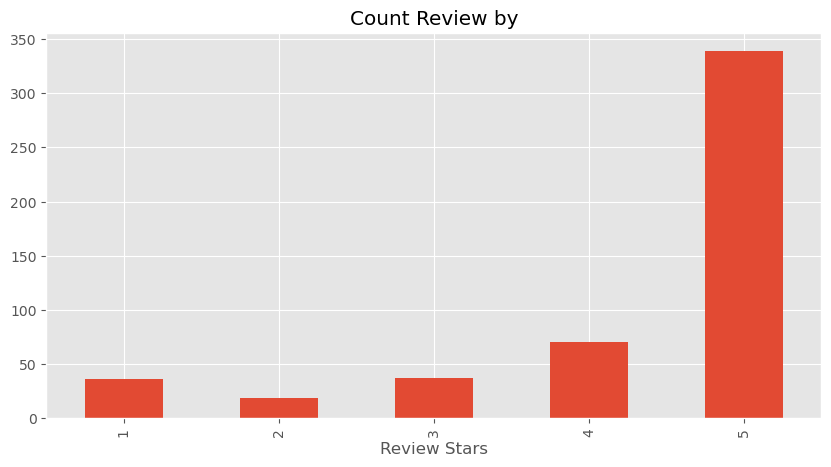

In [19]:
## Quick EDA
ax= df['Score'].value_counts().sort_index().plot(kind='bar',title='Count Review by',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [21]:
##Basic NLTK stuff
example= df['Text'][51]
print(example)

Got a free package of these with a bottle of bloody mary mix I bought from the seller, and the advertising worked..lol,  I tried them, and shared them with 2 buddies, and we all loved them...  So im here to buy more, and noticed there were no reviews yet,...  well now there is.  They are Hot,  but not "burn your mouth forever hot"  its a nice temp...  Perfect for us..


In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyanshinaik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
tokens = nltk.word_tokenize(example)
print(tokens[:10])

['Got', 'a', 'free', 'package', 'of', 'these', 'with', 'a', 'bottle', 'of']


In [29]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/divyanshinaik/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
tagged = nltk.pos_tag(tokens)
print(tagged[:10])

[('Got', 'NNP'), ('a', 'DT'), ('free', 'JJ'), ('package', 'NN'), ('of', 'IN'), ('these', 'DT'), ('with', 'IN'), ('a', 'DT'), ('bottle', 'NN'), ('of', 'IN')]


In [35]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')  # You may also need to download the 'words' dataset

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/divyanshinaik/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/divyanshinaik/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [37]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Got/NNP
  a/DT
  free/JJ
  package/NN
  of/IN
  these/DT
  with/IN
  a/DT
  bottle/NN
  of/IN
  bloody/NN
  mary/JJ
  mix/NN
  I/PRP
  bought/VBD
  from/IN
  the/DT
  seller/NN
  ,/,
  and/CC
  the/DT
  advertising/NN
  worked/VBD
  ../JJ
  lol/NN
  ,/,
  I/PRP
  tried/VBD
  them/PRP
  ,/,
  and/CC
  shared/VBD
  them/PRP
  with/IN
  2/CD
  buddies/NNS
  ,/,
  and/CC
  we/PRP
  all/DT
  loved/VBD
  them/PRP
  .../:
  So/RB
  im/RB
  here/RB
  to/TO
  buy/VB
  more/JJR
  ,/,
  and/CC
  noticed/VBD
  there/EX
  were/VBD
  no/DT
  reviews/NN
  yet/RB
  ,/,
  .../:
  well/RB
  now/RB
  there/EX
  is/VBZ
  ./.
  They/PRP
  are/VBP
  (PERSON Hot/NNP)
  ,/,
  but/CC
  not/RB
  ``/``
  burn/VB
  your/PRP$
  mouth/NN
  forever/RB
  hot/JJ
  ''/''
  its/PRP$
  a/DT
  nice/JJ
  temp/NN
  .../:
  Perfect/NNP
  for/IN
  us/PRP
  ../VBP)


In [39]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyanshinaik/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [43]:
sia.polarity_scores('I am so sad')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [45]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [47]:
sia.polarity_scores('example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [49]:
from tqdm.notebook import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

# Converting the results dictionary to a DataFrame if needed
results_df = pd.DataFrame.from_dict(res, orient='index')


  0%|          | 0/500 [00:00<?, ?it/s]

In [51]:
res = {}
for i, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [53]:
vaders= pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index' : 'Id'})
vaders= vaders.merge(df, how='left')

In [55]:
#noW WE HAVE SENTIMENT SCORE AND METADATA
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


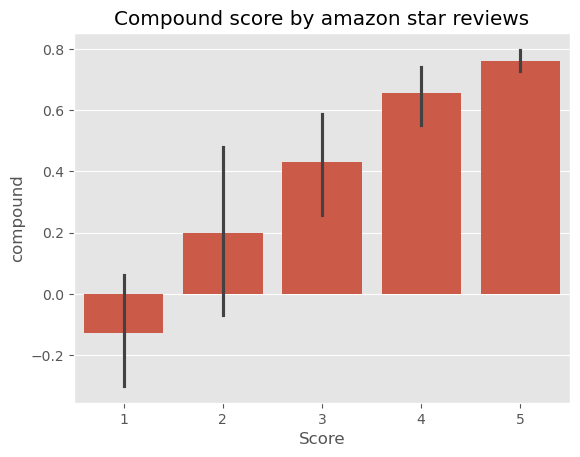

In [57]:
ax= sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound score by amazon star reviews')
plt.show()

Text(0.5, 1.0, 'Negative')

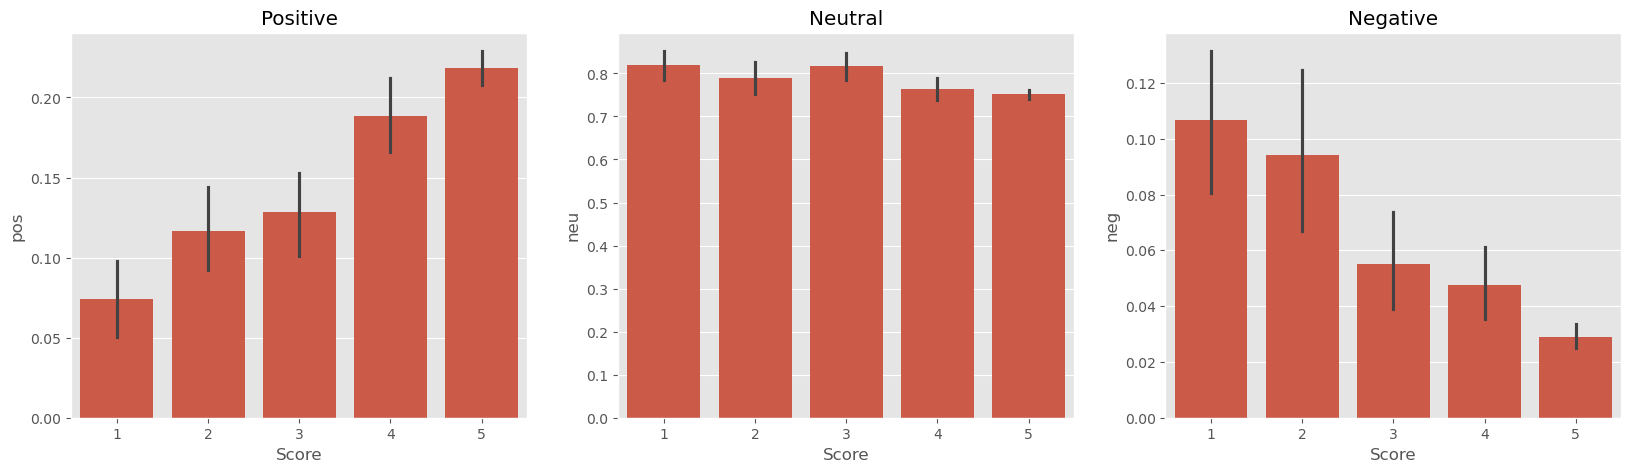

In [59]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.barplot(data=vaders, x= 'Score', y= 'pos', ax=axs[0])
sns.barplot(data=vaders, x= 'Score', y= 'neu', ax=axs[1])
sns.barplot(data=vaders, x= 'Score', y= 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2 ].set_title('Negative')

In [61]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [62]:
!pip install transformers

In [63]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install flax

Note: you may need to restart the kernel to use updated packages.


In [68]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [70]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [71]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [74]:
print(example)
sia.polarity_scores(example)

Got a free package of these with a bottle of bloody mary mix I bought from the seller, and the advertising worked..lol,  I tried them, and shared them with 2 buddies, and we all loved them...  So im here to buy more, and noticed there were no reviews yet,...  well now there is.  They are Hot,  but not "burn your mouth forever hot"  its a nice temp...  Perfect for us..


{'neg': 0.047, 'neu': 0.735, 'pos': 0.218, 'compound': 0.9194}

In [91]:
encoded_text = tokenizer(example, return_tensors='pt')
output= model(**encoded_text)
scores= output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict= {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.005587547, 'roberta_neu': 0.03706889, 'roberta_pos': 0.9573436}


In [98]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output= model(**encoded_text)
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)
    scores_dict= {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    } 
    return scores_dict

In [112]:
vader_result

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [114]:
roberta_result

{'roberta_neg': 0.010577701,
 'roberta_neu': 0.038815767,
 'roberta_pos': 0.95060647}

In [116]:
both = {**vader_result, **roberta_result}

In [120]:
both

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta_neg': 0.010577701,
 'roberta_neu': 0.038815767,
 'roberta_pos': 0.95060647}

In [136]:
res = {}
for i, row in tqdm(df.iterrows(), total= len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Brokefor id{myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Brokefor id83
Brokefor id187


In [143]:
results_df= pd.DataFrame(res).T
results_df= results_df.reset_index().rename(columns={'index' : 'Id'})
results_df= results_df.merge(df, how='left')

In [145]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950606,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047125,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [147]:
##Compare scores between models
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

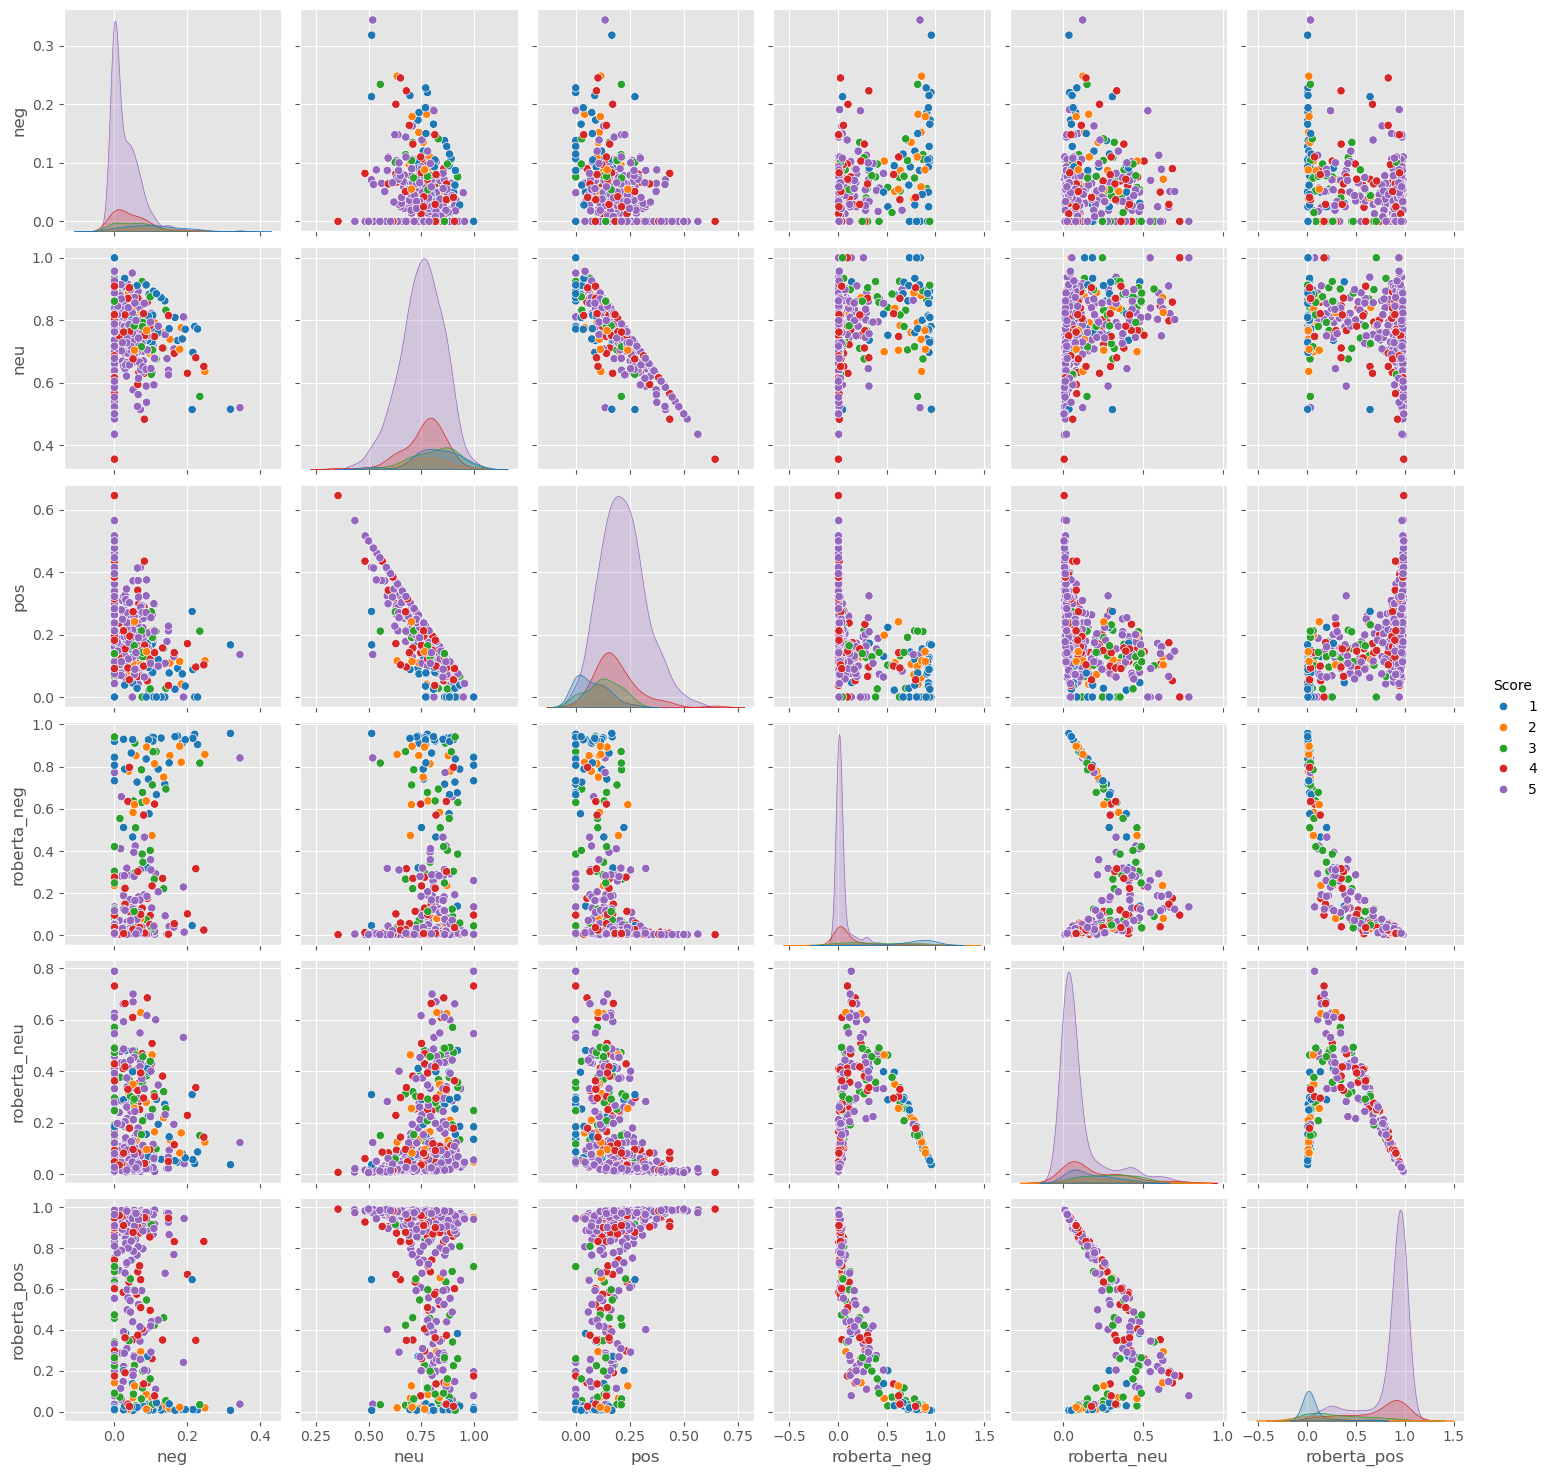

In [153]:
sns.pairplot(data= results_df,
            vars =['neg', 'neu', 'pos',
                 'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette= 'tab10')
plt.show()

In [149]:
print(results_df.columns)

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')


In [157]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False).values[0]

array([325, 0.213, 0.514, 0.274, 0.3185, 0.045876163989305496,
       0.30880317091941833, 0.6453206539154053, 'B000JEHAHS',
       'A2CU16YU1KEOUY', 'Hurricane Ridge "Chris"', 5, 19, 1, 1168300800,
       'Never Arrived',
       'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'],
      dtype=object)

In [169]:
results_df.query('Score == 1').sort_values('pos', ascending=False).values[0]

array([325, 0.213, 0.514, 0.274, 0.3185, 0.045876163989305496,
       0.30880317091941833, 0.6453206539154053, 'B000JEHAHS',
       'A2CU16YU1KEOUY', 'Hurricane Ridge "Chris"', 5, 19, 1, 1168300800,
       'Never Arrived',
       'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'],
      dtype=object)

In [165]:
 results_df.query('Score == 5').sort_values('roberta_neg', ascending=False).values[0]

array([70, 0.344, 0.52, 0.136, -0.7345, 0.8411043882369995,
       0.12269453704357147, 0.03620107099413872, 'B000E7VI7S',
       'AWCBF2ZWIN57F', 'C. Salcido', 0, 2, 5, 1185753600,
       'pretzel haven!',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)

In [167]:
results_df.query('Score == 5').sort_values('neg', ascending=False).values[0]

array([70, 0.344, 0.52, 0.136, -0.7345, 0.8411043882369995,
       0.12269453704357147, 0.03620107099413872, 'B000E7VI7S',
       'AWCBF2ZWIN57F', 'C. Salcido', 0, 2, 5, 1185753600,
       'pretzel haven!',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)